<a href="https://colab.research.google.com/github/ShreyBodra/Machine_Learning/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


nltk.download('stopwords')
nltk.download('punkt')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# read data from csv file
df = pd.read_csv('sample_data/text.csv')

In [ ]:
# Rename the first column to "index"
df.rename(columns={df.columns[0]: 'index'}, inplace=True)

# Set the first column as the index
df.set_index('index', inplace=True)
df.head(10)

,text,label
index,,
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
5,i was beginning to feel quite disheartened,0
6,i would think that whomever would be lucky eno...,2
7,i fear that they won t ever feel that deliciou...,1
8,im forever taking some time out to have a lie ...,5


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = []
  for word in word_tokens:
    if not word.lower() in stop_words:
      word = lemmatizer.lemmatize(word)
      filtered_text.append(word)
  return " ".join(filtered_text)
print(df.head)
df['text'] = df['text'].apply(remove_stopwords)
df.head(10)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<bound method NDFrame.head of                                                      text  label
index                                                           
0           i just feel really helpless and heavy hearted      4
1       ive enjoyed being able to slouch about relax a...      0
2       i gave up my internship with the dmrg and am f...      4
3                              i dont know i feel so lost      0
4       i am a kindergarten teacher and i am thoroughl...      4
...                                                   ...    ...
416804  i feel like telling these horny devils to find...      2
416805  i began to realize that when i was feeling agi...      3
416806  i feel very curious be why previous early dawn...      5
416807  i feel that becuase of the tyranical nature of...      3
416808  i think that after i had spent some time inves...      5

[416809 rows x 2 columns]>


,text,label
index,,
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4
5,beginning feel quite disheartened,0
6,would think whomever would lucky enough stay s...,2
7,fear ever feel delicious excitement christmas ...,1
8,im forever taking time lie feel weird,5


In [ ]:
df.head()

,text,label
index,,
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


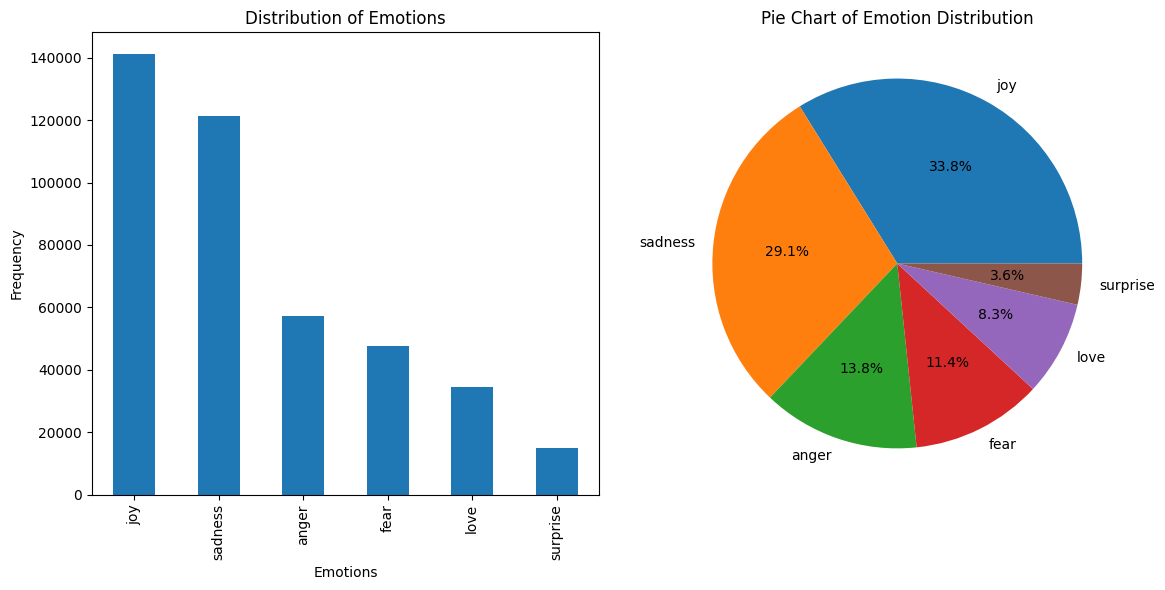

In [ ]:
emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
    # Add more mappings as needed
}


# Replace numeric labels with emotions using the emotion_map dictionary
df['emotion'] = df['label'].map(emotion_map)

# Calculate emotion counts
emotion_counts = df['emotion'].value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
emotion_counts.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Emotions')

# Pie chart
emotion_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Emotion Distribution')
axes[1].set_ylabel('')  # This removes the 'emotion' ylabel which is unnecessary for a pie chart

plt.tight_layout()
plt.show()


In [ ]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['text'])  # Assuming 'text' is your preprocessed text column
y = df['label']  # Assuming 'label' is your sentiment label column

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = df.label)

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


In [ ]:
def tune_naive_bayes(df, text_column, label_column, param_grid, test_size=0.2, random_state=None):
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[label_column], test_size=test_size, random_state=random_state,stratify = df.label=df.label)

    # TF-IDF vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    # Initialize Naive Bayes classifier
    naive_bayes = MultinomialNB()

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid  scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)

    # Print best hyperparameters
    print("Best hyperparameters:", grid_search.best_params_)

    # Evaluate the model on the test set using the best parameters
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_tfidf)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return best_model, report, confusion

# Example usage:
param_grid = {'alpha': [0.1,0.01,0.001,0.02,0.3,0.2, 0.5, 1.0]}  # Adjust alpha values as needed
best_model, report, confusion = tune_naive_bayes(df, 'text', 'label', param_grid)
print(report)
print(confusion)


In [ ]:
# Assuming 'text' is the column with textual data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']  # Assuming 'label' is your target column

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_smote).value_counts())


In [ ]:

# Instantiate the random under-sampler
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_rus).value_counts())

# Train the logistic regression model on the under-sampled data
model_rus = LogisticRegression(solver='lbfgs', max_iter=1000)
model_rus.fit(X_train_rus, y_train_rus)

# Predict on the test set using the model trained on under-sampled data
predictions_rus = model_rus.predict(X_test)

# Print the classification report to evaluate the model
print(classification_report(y_test, predictions_rus))


In [ ]:


# Instantiate the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Original Dataset
nb_classifier.fit(X_train, y_train)
predictions_original = nb_classifier.predict(X_test)
print("Original Data:\n", classification_report(y_test, predictions_original))

# Over-sampled Data with SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
nb_classifier.fit(X_train_smote, y_train_smote)
predictions_smote = nb_classifier.predict(X_test)
print("SMOTE Over-sampled Data:\n", classification_report(y_test, predictions_smote))

# Under-sampled Data
# rus = RandomUnderSampler(random_state=42)
# X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
nb_classifier.fit(X_train_rus, y_train_rus)
predictions_rus = nb_classifier.predict(X_test)
print("Random Under-sampled Data:\n", classification_report(y_test, predictions_rus))


In [ ]:

# Train Naive Bayes on original data
nb_classifier_original = MultinomialNB()
nb_classifier_original.fit(X_train, y_train)

# Train Naive Bayes on SMOTE data
nb_classifier_smote = MultinomialNB()
nb_classifier_smote.fit(X_train_smote, y_train_smote)

# Train Naive Bayes on under-sampled data
nb_classifier_rus = MultinomialNB()
nb_classifier_rus.fit(X_train_rus, y_train_rus)

# Predict class probabilities for each model on the test set
prob_original = nb_classifier_original.predict_proba(X_test)
prob_smote = nb_classifier_smote.predict_proba(X_test)
prob_rus = nb_classifier_rus.predict_proba(X_test)

# Combine the probabilities
# Assuming each row in prob_* is a list of class probabilities for a single instance
combined_probabilities = np.array([prob_original, prob_smote, prob_rus])

# Perform majority voting using mode (hard voting)
# The axis for mode is set so it calculates mode across the models for each instance
votes = np.array([np.argmax(p, axis=1) for p in combined_probabilities])
majority_vote = stats.mode(votes, axis=0)[0].flatten()

# Evaluate the ensemble model
print(classification_report(y_test, majority_vote))
